# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import plotly.express as px

# Loading dataset

In [ ]:
# To load data for pandas, we use pd.read_csv(path)
# This method returns us a DataFrame, which is a pandas data structure
# We can think of the DataFrame as an Excel table with many rows and columns

path = r"./dirty_data.csv"
data = pd.read_csv(path)

data

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,23/3/2023,89 Golf View Hill,Kym,Engall,kengall0@yahoo.com,Female,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Yes
1,13/9/2022,85343 Northland Pass,Miner,Pithie,mpithie1@quantcast.com,Male,85.0,66.0,29.0,0.0,26.6,0.351,31.0,No
2,2022-08-09,1968 Porter Road,Taffy,Fayre,tfayre2@loc.gov,Female,183.0,64.0,0.0,0.0,23.3,0.672,32.0,Yes
3,2023-03-13,799 Buell Street,Datha,Schrieves,dschrieves3@g.co,F,89.0,66.0,23.0,94.0,28.1,0.167,21.0,n
4,2023-12-06,800 Victoria Plaza,Bernetta,Drinnan,bdrinnan4@archive.org,F,137.0,40.0,35.0,168.0,43.1,2.288,33.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,31/12/2022,0691 Golf Course Hill,Jasun,Bowry,jbowry5n@alexa.com,male,99.0,70.0,16.0,44.0,20.4,0.235,27.0,No
787,5/6/2023,27937 Jackson Avenue,Kennett,Weyland,kweyland5o@geocities.com,Male,103.0,72.0,32.0,190.0,37.7,0.324,55.0,No
788,28/6/2023,22083 Bobwhite Point,Kinsley,Pleven,kpleven5p@tumblr.com,male,111.0,72.0,28.0,0.0,23.9,0.407,27.0,No
789,5/5/2023,1844 Del Sol Drive,Amalea,Kynson,akynson5q@4shared.com,Female,196.0,76.0,29.0,280.0,37.5,0.605,57.0,Y


# Inspecting and manipulation of the Dataset

## Viewing the first and last few rows in a dataset

In [ ]:
# Let's take a look at our data set to see that it has been loaded properly
# To view the first 5 rows of our DataFrame, we can use the DataFrame.head() method

data.head()

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,23/3/2023,89 Golf View Hill,Kym,Engall,kengall0@yahoo.com,Female,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Yes
1,13/9/2022,85343 Northland Pass,Miner,Pithie,mpithie1@quantcast.com,Male,85.0,66.0,29.0,0.0,26.6,0.351,31.0,No
2,2022-08-09,1968 Porter Road,Taffy,Fayre,tfayre2@loc.gov,Female,183.0,64.0,0.0,0.0,23.3,0.672,32.0,Yes
3,2023-03-13,799 Buell Street,Datha,Schrieves,dschrieves3@g.co,F,89.0,66.0,23.0,94.0,28.1,0.167,21.0,n
4,2023-12-06,800 Victoria Plaza,Bernetta,Drinnan,bdrinnan4@archive.org,F,137.0,40.0,35.0,168.0,43.1,2.288,33.0,Yes


In [ ]:
# By default, data.head() returns us the top 5 rows of our DataFrame, but we can increase the number of rows too
# If we want to view the first 10 rows of our data, we can easily pass in n=10 as a parameter

data.head(n=10)

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,23/3/2023,89 Golf View Hill,Kym,Engall,kengall0@yahoo.com,Female,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Yes
1,13/9/2022,85343 Northland Pass,Miner,Pithie,mpithie1@quantcast.com,Male,85.0,66.0,29.0,0.0,26.6,0.351,31.0,No
2,2022-08-09,1968 Porter Road,Taffy,Fayre,tfayre2@loc.gov,Female,183.0,64.0,0.0,0.0,23.3,0.672,32.0,Yes
3,2023-03-13,799 Buell Street,Datha,Schrieves,dschrieves3@g.co,F,89.0,66.0,23.0,94.0,28.1,0.167,21.0,n
4,2023-12-06,800 Victoria Plaza,Bernetta,Drinnan,bdrinnan4@archive.org,F,137.0,40.0,35.0,168.0,43.1,2.288,33.0,Yes
5,2022-09-25,0 Arizona Street,Hetti,Bowne,hbowne5@boston.com,Female,116.0,74.0,0.0,0.0,25.6,0.201,30.0,N
6,2022-09-26,4 Old Shore Park,Lindy,Tuiller,ltuille..r6@craigslist.org,Male,78.0,50.0,32.0,88.0,31.0,0.248,26.0,Yes
7,2022-04-12,819 Holy Cross Alley,Germayne,MacGray,gmacgray7@mediafire.com,Male,115.0,0.0,0.0,0.0,35.3,0.134,29.0,No
8,2023-05-20,95122 Buhler Plaza,Antony,Gainsboro,againsboro8@mapquest.com,Male,197.0,70.0,45.0,543.0,30.5,0.158,53.0,Yes
9,2023-01-07,21 Stuart Circle,Orel,McMurrugh,omcmurrugh9@comsenz.com,Female,125.0,96.0,0.0,0.0,0.0,0.232,54.0,Yes


In [ ]:
# What if we wanted to view the last few rows of our DataFrame?
# data.tail() works the same way as data.head(), except it returns the last 5 rows of our DataFrame by default

data.tail()

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
786,31/12/2022,0691 Golf Course Hill,Jasun,Bowry,jbowry5n@alexa.com,male,99.0,70.0,16.0,44.0,20.4,0.235,27.0,No
787,5/6/2023,27937 Jackson Avenue,Kennett,Weyland,kweyland5o@geocities.com,Male,103.0,72.0,32.0,190.0,37.7,0.324,55.0,No
788,28/6/2023,22083 Bobwhite Point,Kinsley,Pleven,kpleven5p@tumblr.com,male,111.0,72.0,28.0,0.0,23.9,0.407,27.0,No
789,5/5/2023,1844 Del Sol Drive,Amalea,Kynson,akynson5q@4shared.com,Female,196.0,76.0,29.0,280.0,37.5,0.605,57.0,Y
790,2/6/2023,384 Spenser Hill,Nathalia,Roscrigg,nroscrigg5r@vinaora.com,Female,162.0,104.0,0.0,0.0,37.7,0.151,52.0,Yes


In [ ]:
# If we just want a random sample, we can make use of data.sample()
# data.sample() returns one random row by default

data.sample()

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
634,26/8/2022,90465 Briar Crest Drive,Sutton,Manie,smaniehm@meetup.com,m,92.0,62.0,0.0,0.0,25.9,0.167,31.0,No


In [ ]:
# If we want to randomly select 10 rows, we can pass in the parameter n=10 as well

data.sample(n=10)

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
489,7/6/2023,6760 Delaware Crossing,Traci,Deackes,tdeackesdl@weather.com,Female,194.0,80.0,0.0,0.0,26.1,0.551,67.0,No
266,19/2/2023,6 Gerald Avenue,Magdalene,Gwilym,mgwilym7e@infoseek.co.jp,Female,138.0,0.0,0.0,0.0,36.3,0.933,25.0,y
135,6/3/2023,655 Forest Dale Point,Chelsae,Cornelisse,ccornelisse3r@marriott.com,female,125.0,60.0,20.0,140.0,33.8,0.088,31.0,No
182,7/1/2023,882 Granby Circle,Izaak,Hilland,ihilland52@newsvine.com,m,0.0,74.0,20.0,23.0,27.7,0.299,21.0,n
330,2023-05-03,97 Heath Place,Graig,Jansson,gjansson96@bloglines.com,Male,118.0,72.0,19.0,0.0,23.1,1.476,46.0,No
448,13/11/2022,9 Saint Paul Circle,Leanor,Appleford,lapplefordcg@shop-pro.jp,Female,104.0,64.0,37.0,64.0,33.6,0.510,22.0,y
491,21/2/2023,310 Autumn Leaf Park,Alfy,Lamberti,alambertidn@latimes.com,F,89.0,90.0,30.0,0.0,33.5,0.292,42.0,No
364,15/6/2023,001 Vermont Avenue,Carmelina,Morant,cmoranta4@lycos.com,F,147.0,74.0,25.0,293.0,34.9,0.385,30.0,No
492,23/7/2023,84040 Center Circle,Koenraad,MacDowall,kmacdowalldo@twitpic.com,m,99.0,68.0,38.0,0.0,32.8,0.145,33.0,No
725,2023-07-02,845 Park Meadow Avenue,Markos,De Biasio,mdebiasiok5@photobucket.com,Male,112.0,78.0,40.0,0.0,39.4,0.236,38.0,No


In [ ]:
# data.sample() can even randomly select x% of our data
# Suppose we wanted to randomly select 5% of our data. We pass in the parameter frac=0.05 instead

data.sample(frac=0.05)

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
337,2022-10-23,967 Moulton Road,Tallia,Housam,thousam9d@elegantthemes.com,Female,115.0,76.0,0.0,0.0,31.2,0.343,44.0,y
304,26/9/2022,442 Browning Avenue,Celestine,Baldrick,cbaldrick8g@princeton.edu,Female,150.0,76.0,0.0,0.0,21.0,0.207,37.0,No
76,2023-05-01,574 Debra Road,Jandy,Prandi,jprandi24@dailymotion.com,Female,62.0,78.0,0.0,0.0,32.6,0.391,41.0,No
33,19/6/2023,09232 Bobwhite Center,Sergent,Bedford,sbedfordx@ucla.edu,male,92.0,92.0,0.0,0.0,19.9,0.188,28.0,No
268,4/4/2023,052 Moland Pass,Gun,Haylett,ghaylett7g@si.edu,Male,102.0,52.0,0.0,0.0,25.1,0.078,21.0,No
112,25/10/2022,1537 Loomis Parkway,Farrand,Sokale,fsokale34@live.com,F,89.0,76.0,34.0,37.0,31.2,0.192,23.0,No
713,30/11/2022,75590 Drewry Street,Michaeline,Bracknell,mbracknelljt@e-recht24.de,f,134.0,58.0,20.0,NaN,26.4,0.352,21.0,No
789,5/5/2023,1844 Del Sol Drive,Amalea,Kynson,akynson5q@4shared.com,Female,196.0,76.0,29.0,280.0,37.5,0.605,57.0,Y
627,10/3/2022,08485 Anderson Road,Alfy,Colerick,acolerickhf@google.ru,Female,132.0,78.0,0.0,0.0,32.4,0.393,21.0,No
240,8/7/2022,07702 Mockingbird Crossing,Chloette,Cheeseman,ccheeseman6o@wikipedia.org,f,91.0,64.0,24.0,0.0,29.2,0.192,21.0,N


## Getting the dimensions of a dataframe

In [ ]:
# What if we wanted a quick overview of the number of rows and columns?
# DataFrame.shape gives us a tuple representing the rows and columns the DataFrame has in the form: (rows,columns)

data.shape

(791, 14)

## Getting a concise summary of a dataframe

In [ ]:
# DataFrame.info() shows us the number of columns we have, their column names, as well as number of non-null values
# We can see that there are definitely some rows with missing values in our columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date_of_discovery         790 non-null    object 
 1   address                   789 non-null    object 
 2   first_name                789 non-null    object 
 3   last_name                 789 non-null    object 
 4   email                     790 non-null    object 
 5   gender                    789 non-null    object 
 6   Glucose                   790 non-null    float64
 7   BloodPressure             790 non-null    float64
 8   SkinThickness             788 non-null    float64
 9   Insulin                   788 non-null    float64
 10  BMI                       789 non-null    float64
 11  DiabetesPedigreeFunction  790 non-null    float64
 12  Age                       790 non-null    float64
 13  Outcome                   791 non-null    object 
dtypes: float64

## Generating descriptive statistics about the dataset

In [ ]:
# DataFrame.describe() returns us descriptive statistics for each column
# Notice Pandas only displays summary statistics of columns that are float64

data.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,790.000000,790.000000,788.000000,788.000000,789.000000,790.000000,790.000000
mean,121.231646,69.124051,20.647208,79.285533,31.980355,0.471563,33.260759
std,31.986820,19.348837,15.939447,115.016461,7.873987,0.329879,11.753396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.250000,62.500000,0.000000,0.000000,27.300000,0.241500,24.000000
50%,117.000000,72.000000,23.000000,27.000000,32.000000,0.374500,29.000000
75%,141.000000,80.000000,32.000000,126.000000,36.600000,0.626750,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
# What if we wanted to select just a few columns?
# pandas provides us an easy way to do so, using []
# We can either pass in the column name as a string, or a list of column names

data['Insulin']

0        0.0
1        0.0
2        0.0
3       94.0
4      168.0
       ...  
786     44.0
787    190.0
788      0.0
789    280.0
790      0.0
Name: Insulin, Length: 791, dtype: float64

In [ ]:
# We can select specific columns we want to describe as well
# Notice .describe() returns different descriptions of the data? We are now seeing unique, top and frequency.
# We no longer have mean, standard deviation, etc.

data[["first_name", "last_name"]].describe()

,first_name,last_name
count,789,789
unique,723,760
top,Nicky,Shuttell
freq,3,2


In [ ]:
# Passing in include='all' forces Pandas to display all columns
# As expected, we see NaN values for strings
# We also see unique, top, frequency being introduced to the result

data.describe(include='all')

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,790,789,789,789,790,789,790.000000,790.000000,788.000000,788.000000,789.000000,790.000000,790.000000,791
unique,413,765,723,760,767,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,12/2/2022,92162 Anhalt Circle,Nicky,Shuttell,mshuttell5i@google.com.br,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,7,2,3,2,2,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415
mean,NaN,NaN,NaN,NaN,NaN,NaN,121.231646,69.124051,20.647208,79.285533,31.980355,0.471563,33.260759,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,31.986820,19.348837,15.939447,115.016461,7.873987,0.329879,11.753396,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,99.250000,62.500000,0.000000,0.000000,27.300000,0.241500,24.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,117.000000,72.000000,23.000000,27.000000,32.000000,0.374500,29.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,141.000000,80.000000,32.000000,126.000000,36.600000,0.626750,41.000000,NaN


## Getting the data types of the columns

In [ ]:
# To find the data types of the values in each column, we can also use data.dtypes
# The data type object stores text or a mix of numeric and non-numeric values
# You can think of float64 as the Python float

data.dtypes

date_of_discovery            object
address                      object
first_name                   object
last_name                    object
email                        object
gender                       object
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                      object
dtype: object

## Computing pairwise correlation of columns

In [ ]:
# What if we wanted a quick way to figure out possible relationships between variables?
# DataFrame.corr() returns the Pearson Correlation Coefficient (r) between every 2 variables
# We provide an input numeric_only=True to only compute r for columns that have numbers

data.corr(numeric_only=True)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.152992,0.056238,0.330762,0.226703,0.139287,0.271767
BloodPressure,0.152992,1.000000,0.211044,0.089043,0.268644,0.044404,0.233547
SkinThickness,0.056238,0.211044,1.000000,0.438632,0.383549,0.190314,-0.105079
Insulin,0.330762,0.089043,0.438632,1.000000,0.196510,0.185499,-0.027353
BMI,0.226703,0.268644,0.383549,0.196510,1.000000,0.142859,0.047832
DiabetesPedigreeFunction,0.139287,0.044404,0.190314,0.185499,0.142859,1.000000,0.034248
Age,0.271767,0.233547,-0.105079,-0.027353,0.047832,0.034248,1.000000


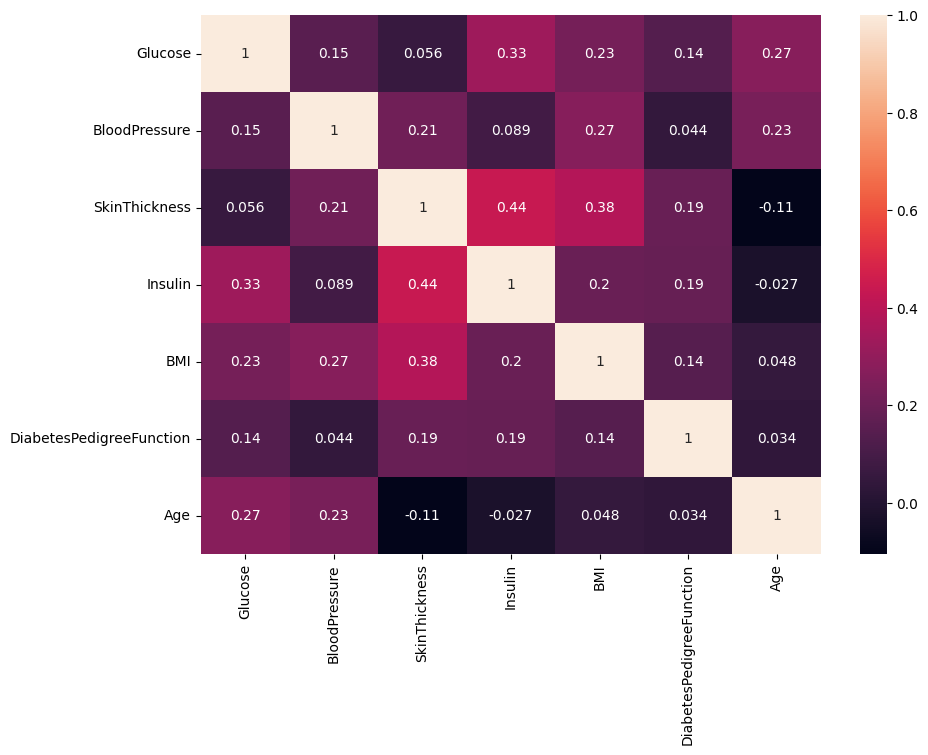

In [ ]:
# How can we make the visualization clearer?
# We can plot a heatmap that corresponds to the r value to easily identify variables that are correlated

# Resize the figure to make it bigger using figsize(10,7)
# fig refers to the figure: the object that contains all our subplots
# ax refers to the axes of our figure

fig, ax = plt.subplots(figsize=(10, 7))

# We use seaborn to plot a heatmap
# Pass in data.corr() to supply the product moment correlation coefficients as the values
# Pass in annot=True to display the r values on the heatmap as well

sns.heatmap(
    data.corr(numeric_only=True),
    annot=True
)

# Display the graph plotted

plt.show()

## Checking if there are any NaNs

In [ ]:
# In data analysis, it's important for us to check for any NaN (Not a Number) values
# NaN values usually refer to blank values in our dataset
# .isnull() returns us a DataFrame object of True/False for each data point (think of it as each cell in Excel)
# But this form isn't particularly useful for us, as we usually want to filter out the rows with any NaN

data.isnull()

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,False,False,False,False,False,False,False,False,False,False,False,False,False,False
787,False,False,False,False,False,False,False,False,False,False,False,False,False,False
788,False,False,False,False,False,False,False,False,False,False,False,False,False,False
789,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Let's count the number of NaN values in each column
# .sum() sums up the number of True for each column
# We can use the methods together to figure out the number of NaN values in each column

data.isnull().sum()

date_of_discovery           1
address                     2
first_name                  2
last_name                   2
email                       1
gender                      2
Glucose                     1
BloodPressure               1
SkinThickness               3
Insulin                     3
BMI                         2
DiabetesPedigreeFunction    1
Age                         1
Outcome                     0
dtype: int64

In [ ]:
# Get the rows that have NaN values
# .any(axis=1) returns us the rows that contain at least 1 True

data[data.isnull().any(axis=1)]

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
15,2022-08-13,3 Forest Court,Xenos,Twidell,xtwidellf@netscape.com,NaN,100.0,0.0,0.0,0.0,30.0,0.484,32.0,Y
17,30/6/2023,0110 Hansons Lane,Reginald,Maton,rmatonh@freewebs.com,Male,107.0,74.0,NaN,0.0,29.6,0.254,31.0,Yes
35,30/11/2022,77876 Pine View Point,Andromache,Croston,acrostonz@freewebs.com,Female,103.0,NaN,33.0,192.0,24.0,0.966,33.0,No
53,7/6/2023,2576 Hauk Center,Cobb,Naper,cnaper1h@nationalgeographic.com,Male,176.0,90.0,34.0,NaN,33.7,0.467,58.0,Yes
85,2023-07-25,5889 Truax Avenue,Kippy,Julian,NaN,Male,110.0,74.0,29.0,125.0,32.4,0.698,27.0,N
108,27/12/2022,NaN,Wernher,Vreiberg,wvreiberg30@buzzfeed.com,male,83.0,58.0,31.0,18.0,34.3,0.336,25.0,No
115,18/11/2022,490 Milwaukee Plaza,Cara,Lyste,clyste37@miitbeian.gov.cn,Female,146.0,92.0,0.0,0.0,NaN,0.539,61.0,Yes
288,12/6/2022,78625 Del Mar Lane,Patricio,NaN,pgillanders80@domainmarket.com,male,96.0,56.0,17.0,49.0,20.8,0.340,26.0,No
341,2023-04-05,90 Portage Terrace,Tobiah,Ducker,tducker9h@washington.edu,Male,NaN,74.0,21.0,73.0,25.9,0.673,36.0,No
344,7/12/2023,301 Oak Valley Center,Luther,Larmett,llarmett9k@admin.ch,m,95.0,72.0,NaN,0.0,36.8,0.485,57.0,No


In [ ]:
# Proportion of rows with missing data

proportion = len(data[data.isnull().any(axis=1)])/len(data) * 100
print(f'Approximately {proportion:.2f}% of rows have missing data.')

Approximately 2.78% of rows have missing data.


## Adding and dropping of columns

In [ ]:
# Create a dummy Series object
# Think of Series as a single column, whereas a DataFrame is the entire spreadsheet with rows and columns
# We are inputting 1 for as many rows as there are in our data, and we name it nonsense

ones_series = pd.Series([1] * len(data), name = "nonsense")

In [ ]:
ones_series

0      1
1      1
2      1
3      1
4      1
      ..
786    1
787    1
788    1
789    1
790    1
Name: nonsense, Length: 791, dtype: int64

In [ ]:
# Usage of pd.concat() to concatenate ones_series to data
# Pass in axis=1 to concatenate along the columns

# Why do we need to know how to concatenate?
# Sometimes we might have data from different sources (scraped data, multiple data sources from different years, etc.)
# We concatenate data to consolidate the information from different sources, so we can clean all the data simultaneously

data = pd.concat([data, ones_series], axis = 1)
data.head()

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,nonsense
0,23/3/2023,89 Golf View Hill,Kym,Engall,kengall0@yahoo.com,Female,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Yes,1
1,13/9/2022,85343 Northland Pass,Miner,Pithie,mpithie1@quantcast.com,Male,85.0,66.0,29.0,0.0,26.6,0.351,31.0,No,1
2,2022-08-09,1968 Porter Road,Taffy,Fayre,tfayre2@loc.gov,Female,183.0,64.0,0.0,0.0,23.3,0.672,32.0,Yes,1
3,2023-03-13,799 Buell Street,Datha,Schrieves,dschrieves3@g.co,F,89.0,66.0,23.0,94.0,28.1,0.167,21.0,n,1
4,2023-12-06,800 Victoria Plaza,Bernetta,Drinnan,bdrinnan4@archive.org,F,137.0,40.0,35.0,168.0,43.1,2.288,33.0,Yes,1


In [ ]:
# Sometimes we might have columns we do not need for our analysis, so we can remove them
# As you can see, we only have 14 columns and we already need to scroll left and right to view all the columns
# Imagine if we had more columns! It would be best to just remove columns we don't need for analysis

# Here we use data.drop() to remove the nonsense column we added in the previous cell

# Another alternative would be: data.drop(['nonsense'], axis=1, inplace=True)
# By default, DataFrame.drop() returns a new DataFrame, meaning the original DataFrame is untouched
# To overcome this, we simply reassign data to the new DataFrame

data = data.drop(["nonsense"], axis = 1)
data.head()

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,23/3/2023,89 Golf View Hill,Kym,Engall,kengall0@yahoo.com,Female,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Yes
1,13/9/2022,85343 Northland Pass,Miner,Pithie,mpithie1@quantcast.com,Male,85.0,66.0,29.0,0.0,26.6,0.351,31.0,No
2,2022-08-09,1968 Porter Road,Taffy,Fayre,tfayre2@loc.gov,Female,183.0,64.0,0.0,0.0,23.3,0.672,32.0,Yes
3,2023-03-13,799 Buell Street,Datha,Schrieves,dschrieves3@g.co,F,89.0,66.0,23.0,94.0,28.1,0.167,21.0,n
4,2023-12-06,800 Victoria Plaza,Bernetta,Drinnan,bdrinnan4@archive.org,F,137.0,40.0,35.0,168.0,43.1,2.288,33.0,Yes


# Handling Missing Data

## First way: Drop all the rows with missing values (easiest)

In [ ]:
# Drop NaNs
dropped_na_dataset = data.dropna()

In [ ]:
dropped_na_dataset.head()

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,23/3/2023,89 Golf View Hill,Kym,Engall,kengall0@yahoo.com,Female,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Yes
1,13/9/2022,85343 Northland Pass,Miner,Pithie,mpithie1@quantcast.com,Male,85.0,66.0,29.0,0.0,26.6,0.351,31.0,No
2,2022-08-09,1968 Porter Road,Taffy,Fayre,tfayre2@loc.gov,Female,183.0,64.0,0.0,0.0,23.3,0.672,32.0,Yes
3,2023-03-13,799 Buell Street,Datha,Schrieves,dschrieves3@g.co,F,89.0,66.0,23.0,94.0,28.1,0.167,21.0,n
4,2023-12-06,800 Victoria Plaza,Bernetta,Drinnan,bdrinnan4@archive.org,F,137.0,40.0,35.0,168.0,43.1,2.288,33.0,Yes


In [ ]:
dropped_na_dataset.isnull().sum()

date_of_discovery           0
address                     0
first_name                  0
last_name                   0
email                       0
gender                      0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
print(f"Number of records in original dataset: {data.shape[0]}")
print(f"Number of records in dataset after dropping all the NaNs: {dropped_na_dataset.shape[0]}")
print(f"Difference: {data.shape[0] - dropped_na_dataset.shape[0]}")

Number of records in original dataset: 791
Number of records in dataset after dropping all the NaNs: 769
Difference: 22


## Second way: Impute missing values

In [ ]:
# For this section, let's create a dummy dataset in order to visualise the results
dummy = {
    'feature_a': [None, None, None, None, 5],
    'feature_b': [10, None, 30, 40, 50],
    'feature_c': [1, 1, 2, None, 2],
    'feature_d': [1, 1, 1, 3, None]
}

In [ ]:
dummy_df = pd.DataFrame(dummy)
dummy_df

,feature_a,feature_b,feature_c,feature_d
0,NaN,10.0,1.0,1.0
1,NaN,NaN,1.0,1.0
2,NaN,30.0,2.0,1.0
3,NaN,40.0,NaN,3.0
4,5.0,50.0,2.0,NaN


### Fill with a constant value

In [ ]:
# The original DataFrame
print("Original DataFrame")
display(dummy_df)

# Fill with a constant value
constant_imputation = dummy_df.fillna(1000)
print("\nConstant Value Imputated DataFrame")
constant_imputation

Original DataFrame


,feature_a,feature_b,feature_c,feature_d
0,NaN,10.0,1.0,1.0
1,NaN,NaN,1.0,1.0
2,NaN,30.0,2.0,1.0
3,NaN,40.0,NaN,3.0
4,5.0,50.0,2.0,NaN



Constant Value Imputated DataFrame


,feature_a,feature_b,feature_c,feature_d
0,1000.0,10.0,1.0,1.0
1,1000.0,1000.0,1.0,1.0
2,1000.0,30.0,2.0,1.0
3,1000.0,40.0,1000.0,3.0
4,5.0,50.0,2.0,1000.0


### Fill with Mean

In [ ]:
# The original DataFrame
print("Original DataFrame")
display(dummy_df)

# Fill with mean
mean_imputation = dummy_df.fillna(dummy_df.mean())
print("\nMean Imputated DataFrame")
display(mean_imputation)

Original DataFrame


,feature_a,feature_b,feature_c,feature_d
0,NaN,10.0,1.0,1.0
1,NaN,NaN,1.0,1.0
2,NaN,30.0,2.0,1.0
3,NaN,40.0,NaN,3.0
4,5.0,50.0,2.0,NaN



Mean Imputated DataFrame


,feature_a,feature_b,feature_c,feature_d
0,5.0,10.0,1.0,1.0
1,5.0,32.5,1.0,1.0
2,5.0,30.0,2.0,1.0
3,5.0,40.0,1.5,3.0
4,5.0,50.0,2.0,1.5


### Fill with Median

In [ ]:
# The original DataFrame
print("Original DataFrame")
display(dummy_df)

# Fill with median
median_imputation = dummy_df.fillna(dummy_df.median())
print("\nMedian Imputated DataFrame")
display(median_imputation)

Original DataFrame


,feature_a,feature_b,feature_c,feature_d
0,NaN,10.0,1.0,1.0
1,NaN,NaN,1.0,1.0
2,NaN,30.0,2.0,1.0
3,NaN,40.0,NaN,3.0
4,5.0,50.0,2.0,NaN



Median Imputated DataFrame


,feature_a,feature_b,feature_c,feature_d
0,5.0,10.0,1.0,1.0
1,5.0,35.0,1.0,1.0
2,5.0,30.0,2.0,1.0
3,5.0,40.0,1.5,3.0
4,5.0,50.0,2.0,1.0


### Fill with Mode

In [ ]:
# The original DataFrame
print("Original DataFrame")
display(dummy_df)

# Fill with mode (most frequent value)
mode_imputation = dummy_df.fillna(dummy_df.mode().iloc[0])
print("\nMode Imputated DataFrame")
display(mode_imputation)

Original DataFrame


,feature_a,feature_b,feature_c,feature_d
0,NaN,10.0,1.0,1.0
1,NaN,NaN,1.0,1.0
2,NaN,30.0,2.0,1.0
3,NaN,40.0,NaN,3.0
4,5.0,50.0,2.0,NaN



Mode Imputated DataFrame


,feature_a,feature_b,feature_c,feature_d
0,5.0,10.0,1.0,1.0
1,5.0,10.0,1.0,1.0
2,5.0,30.0,2.0,1.0
3,5.0,40.0,1.0,3.0
4,5.0,50.0,2.0,1.0


### Forward Fill

In [ ]:
# Forward fill
# Do note that there will still be NaNs if the column have leading NaNs for forward fill or trailing NaNs for backward fill

# The original DataFrame
print("Original DataFrame")
display(dummy_df)

forward_fill_imputation = dummy_df.fillna(method='ffill')
print("\nForward Filled DataFrame")
display(forward_fill_imputation)

Original DataFrame


,feature_a,feature_b,feature_c,feature_d
0,NaN,10.0,1.0,1.0
1,NaN,NaN,1.0,1.0
2,NaN,30.0,2.0,1.0
3,NaN,40.0,NaN,3.0
4,5.0,50.0,2.0,NaN



Forward Filled DataFrame


,feature_a,feature_b,feature_c,feature_d
0,NaN,10.0,1.0,1.0
1,NaN,10.0,1.0,1.0
2,NaN,30.0,2.0,1.0
3,NaN,40.0,2.0,3.0
4,5.0,50.0,2.0,3.0


### Backfill

In [ ]:
# Backward fill
# Do note that there will still be NaNs if the column have leading NaNs for forward fill or trailing NaNs for backward fill

# The original DataFrame
print("Original DataFrame")
display(dummy_df)

backward_fill_imputation = dummy_df.fillna(method='bfill')
print("\nBackfilled DataFrame")
display(backward_fill_imputation)

Original DataFrame


,feature_a,feature_b,feature_c,feature_d
0,NaN,10.0,1.0,1.0
1,NaN,NaN,1.0,1.0
2,NaN,30.0,2.0,1.0
3,NaN,40.0,NaN,3.0
4,5.0,50.0,2.0,NaN



Backfilled DataFrame


,feature_a,feature_b,feature_c,feature_d
0,5.0,10.0,1.0,1.0
1,5.0,30.0,1.0,1.0
2,5.0,30.0,2.0,1.0
3,5.0,40.0,2.0,3.0
4,5.0,50.0,2.0,NaN


### K-Nearest Neighbour (KNN) Imputation

In [ ]:
# Creating an imputer
imputer = KNNImputer(n_neighbors=2)

# Perform KNN Imputation
KNN_imputation_array = imputer.fit_transform(dummy_df)

In [ ]:
# The original DataFrame
print("Original DataFrame")
display(dummy_df)

print("\nKNN Imputated DataFrame")
KNN_imputation = pd.DataFrame(KNN_imputation_array, columns=["feature_a", "feature_b", "feature_c", "feature_d"])
display(KNN_imputation)

Original DataFrame


,feature_a,feature_b,feature_c,feature_d
0,NaN,10.0,1.0,1.0
1,NaN,NaN,1.0,1.0
2,NaN,30.0,2.0,1.0
3,NaN,40.0,NaN,3.0
4,5.0,50.0,2.0,NaN



KNN Imputated DataFrame


,feature_a,feature_b,feature_c,feature_d
0,5.0,10.0,1.0,1.0
1,5.0,20.0,1.0,1.0
2,5.0,30.0,2.0,1.0
3,5.0,40.0,1.5,3.0
4,5.0,50.0,2.0,2.0


# Dealing with Duplicates

In [ ]:
# For the rest of the workshop, we will drop all rows with missing values

data = dropped_na_dataset

In [ ]:
# Check the entire DataFrame for any duplicate values
# .duplicated() returns a Series of True/False values, for each row it returns True only if the entire row is duplicated
# Think of a Series as one column of an Excel table
# Again, we want to see how many duplicates there are, so this representation is not very useful

data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
786     True
787     True
788     True
789     True
790     True
Length: 769, dtype: bool

In [ ]:
# Count the number of duplicated rows

data.duplicated().sum()

16

In [ ]:
# Select all rows that are duplicated

data[data.duplicated()]

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
768,17/3/2023,908 Reinke Alley,Kienan,Brayley,kbrayley55@answers.com,Male,194.0,68.0,28.0,0.0,35.9,0.745,41.0,Yes
769,31/1/2023,3 Granby Circle,Ichabod,Nabbs,inabbs56@yahoo.co.jp,Male,181.0,68.0,36.0,495.0,30.1,0.615,60.0,Yes
770,21/9/2022,419 Schmedeman Parkway,Thomas,Dy,tdy57@squidoo.com,Male,128.0,98.0,41.0,58.0,32.0,1.321,33.0,Yes
771,29/6/2023,2 Melody Park,Julio,Eschelle,jeschelle58@moonfruit.com,Male,109.0,76.0,39.0,114.0,27.9,0.640,31.0,Yes
772,17/11/2022,5 Stephen Circle,Nessi,Mulheron,nmulheron59@skyrock.com,Female,139.0,80.0,35.0,160.0,31.6,0.361,25.0,Yes
773,22/1/2023,3614 Michigan Hill,Anselm,Fleischmann,afleischmann5a@aol.com,Male,111.0,62.0,0.0,0.0,22.6,0.142,21.0,N
774,30/10/2022,515 Walton Terrace,Brear,Leguay,bleguay5b@earthlink.net,Female,123.0,70.0,44.0,94.0,33.1,0.374,40.0,No
775,27/3/2023,276 Emmet Avenue,Krissy,Shakesby,kshakesby5c@foxnews.com,Female,159.0,66.0,0.0,0.0,30.4,0.383,36.0,Y
783,30/4/2023,35 Lake View Court,Nolan,Lamartine,nlamartine5k@geocities.jp,M,113.0,80.0,16.0,0.0,31.0,0.874,21.0,No
784,21/5/2023,0418 Dakota Drive,Chandler,Lillicrap,clillicrap5l@freewebs.com,Male,138.0,82.0,0.0,0.0,40.1,0.236,28.0,No


In [ ]:
# remove all duplicates

# Another alternative would be: data = data.drop_duplicates()
# By default, DataFrame.drop_duplicates() returns a new DataFrame, meaning the original DataFrame is untouched
# To overcome this, we simply reassign data to the new DataFrame without duplciates

data.drop_duplicates(inplace=True)

# Outlier Detection and Treatment

In [ ]:
# box plots for each variable

fig = px.box(data, y=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',])

fig.show()

In [ ]:
def drop_outliers(data, column):

  # Find the upper and lower quartiles for the numeric column
  upper_quartile = data[column].quantile(q=0.75)
  lower_quartile = data[column].quantile(q=0.25)

  # Find the interquartile range, lower bound and upper bound
  iqr = upper_quartile - lower_quartile
  lower_bound = lower_quartile - 1.5 * iqr
  upper_bound = upper_quartile + 1.5 * iqr

  # Keep the data we want - select rows that lie within the upper and lower bounds (non-outliers)
  # Pandas does not allow us to use the keyword 'and' within square brackets, so we use '&'
  kept_data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

  return kept_data

In [ ]:
print(f"number of rows before outlier removal: {len(data)}")

number of rows before outlier removal: 753


In [ ]:
# We will use the Interquantile Range to determine the outliers and remove them from the dataset

# Create a list of the columns with numeric data types
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Loop through to remove outliers
for column in columns:
  data = drop_outliers(data, column)

In [ ]:
print(f"number of rows after outlier removal: {len(data)}")

number of rows after outlier removal: 631


In [ ]:
# Note that there are new outliers even after removing of outliers previously
# This is because the IQR has changed. Since there is a smaller spread of values, IQR is smaller

fig = px.box(data, y=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',])
fig.show()

# Encoding Categorical Variables (Integer Encoding)

In [ ]:
# What are the unique values in the 'Outcome' column?
# .value_counts() counts the number of occurrences of unique values in the 'Outcome' column

data['Outcome'].value_counts()

No     344
Yes    145
N       43
n       41
y       38
Y       20
Name: Outcome, dtype: int64

In [ ]:
# Lowercase all string values in 'Outcome' column
# .apply() is a method that helps us to apply a function along an axis of the DataFrame or Series

data['Outcome'] = data['Outcome'].apply(str.lower)

# Now, every entry in 'Outcome' either starts with 'y' or 'n'. This makes it easy for us to assign integer values based on the 'Outcome' column
data['Outcome'].value_counts()

no     344
yes    145
n       84
y       58
Name: Outcome, dtype: int64

In [ ]:
# Define a function convert() that takes in a string and checks if the first character is 'y' or 'n'

def convert(value):
  if value[0] == 'y':
    return 1
  elif value[0] == 'n':
    return 0

In [ ]:
# Create a new column 'int_outcome' corresponding to the 'Outcome' column
# if the string in the row starts with 'y', our corresponding 'int_outcome' column returns 1

data['int_outcome'] = data['Outcome'].apply(convert)

In [ ]:
data.head()

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,int_outcome
0,23/3/2023,89 Golf View Hill,Kym,Engall,kengall0@yahoo.com,Female,148.0,72.0,35.0,0.0,33.6,0.627,50.0,yes,1
1,13/9/2022,85343 Northland Pass,Miner,Pithie,mpithie1@quantcast.com,Male,85.0,66.0,29.0,0.0,26.6,0.351,31.0,no,0
2,2022-08-09,1968 Porter Road,Taffy,Fayre,tfayre2@loc.gov,Female,183.0,64.0,0.0,0.0,23.3,0.672,32.0,yes,1
3,2023-03-13,799 Buell Street,Datha,Schrieves,dschrieves3@g.co,F,89.0,66.0,23.0,94.0,28.1,0.167,21.0,n,0
5,2022-09-25,0 Arizona Street,Hetti,Bowne,hbowne5@boston.com,Female,116.0,74.0,0.0,0.0,25.6,0.201,30.0,n,0


# Handling Date and Time Data

In [ ]:
print(type(data['date_of_discovery'][0]))
# Convert 'date_of_discovery' column to datetime, so that the format will be standardized
# Pass in infer_datetime_format=True to get pandas to infer the datetime format for us

data['date_of_discovery'] = pd.to_datetime(data['date_of_discovery'], infer_datetime_format=True)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
data.head()

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,int_outcome
0,2023-03-23,89 Golf View Hill,Kym,ENGALL,kengall0@yahoo.com,Female,148.0,72.0,35.0,0.0,33.6,0.627,50.0,yes,1
1,2022-09-13,85343 Northland Pass,Miner,PITHIE,mpithie1@quantcast.com,Male,85.0,66.0,29.0,0.0,26.6,0.351,31.0,no,0
2,2022-08-09,1968 Porter Road,Taffy,FAYRE,tfayre2@loc.gov,Female,183.0,64.0,0.0,0.0,23.3,0.672,32.0,yes,1
3,2023-03-13,799 Buell Street,Datha,SCHRIEVES,dschrieves3@g.co,F,89.0,66.0,23.0,94.0,28.1,0.167,21.0,n,0
5,2022-09-25,0 Arizona Street,Hetti,BOWNE,hbowne5@boston.com,Female,116.0,74.0,0.0,0.0,25.6,0.201,30.0,n,0


In [ ]:
# date_of_discovery column is now converted to datetime
data.dtypes

date_of_discovery           datetime64[ns]
address                             object
first_name                          object
last_name                           object
email                               object
gender                              object
Glucose                            float64
BloodPressure                      float64
SkinThickness                      float64
Insulin                            float64
BMI                                float64
DiabetesPedigreeFunction           float64
Age                                float64
Outcome                             object
int_outcome                          int64
dtype: object

# Dealing with Text Data

## Changing values to uppercase

In [ ]:
upper_last_name = data['last_name'].str.upper()
data['last_name'] = upper_last_name
data.head()

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,int_outcome
0,2023-03-23,89 Golf View Hill,Kym,ENGALL,kengall0@yahoo.com,Female,148.0,72.0,35.0,0.0,33.6,0.627,50.0,yes,1
1,2022-09-13,85343 Northland Pass,Miner,PITHIE,mpithie1@quantcast.com,Male,85.0,66.0,29.0,0.0,26.6,0.351,31.0,no,0
2,2022-08-09,1968 Porter Road,Taffy,FAYRE,tfayre2@loc.gov,Female,183.0,64.0,0.0,0.0,23.3,0.672,32.0,yes,1
3,2023-03-13,799 Buell Street,Datha,SCHRIEVES,dschrieves3@g.co,F,89.0,66.0,23.0,94.0,28.1,0.167,21.0,n,0
5,2022-09-25,0 Arizona Street,Hetti,BOWNE,hbowne5@boston.com,Female,116.0,74.0,0.0,0.0,25.6,0.201,30.0,n,0


## Split strings into list of words

In [ ]:
split_address = data['address'].str.split()
split_address.head()

0      [89, Golf, View, Hill]
1    [85343, Northland, Pass]
2        [1968, Porter, Road]
3        [799, Buell, Street]
5        [0, Arizona, Street]
Name: address, dtype: object

In [ ]:
edu_emails = data.loc[data['email'].str.contains('edu')]
edu_emails

,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,int_outcome
27,2022-12-29,7 Esker Crossing,Magnum,POSTAN,mpostanr@harvard.edu,Male,97.0,66.0,15.0,140.0,23.2,0.487,22.0,no,0
33,2023-06-19,09232 Bobwhite Center,Sergent,BEDFORD,sbedfordx@ucla.edu,male,92.0,92.0,0.0,0.0,19.9,0.188,28.0,no,0
56,2023-07-02,93012 Tomscot Point,Duane,RUNACRES,drunacres1k@si.edu,Male,187.0,68.0,39.0,304.0,37.7,0.254,41.0,y,1
59,2023-07-17,1 Talisman Place,Fae,FOULDES,ffouldes1n@nyu.edu,Female,105.0,64.0,41.0,142.0,41.5,0.173,22.0,no,0
91,2023-01-24,93830 Meadow Ridge Court,Hayward,FARDON,hfardon2j@cmu.edu,male,123.0,80.0,15.0,176.0,32.0,0.443,34.0,no,0
169,2023-02-28,30368 Mosinee Park,Cariotta,HARTUS,chartus4p@umn.edu,Female,111.0,90.0,12.0,78.0,28.4,0.495,29.0,no,0
183,2023-03-02,07573 Bartelt Hill,Rhianon,HUSBY,rhusby53@edublogs.org,Female,73.0,60.0,0.0,0.0,26.8,0.268,27.0,no,0
227,2023-07-11,6020 Di Loreto Court,Emogene,DUMINI,edumini6b@usda.gov,Female,162.0,52.0,38.0,0.0,37.2,0.652,24.0,yes,1
255,2022-09-18,36836 Magdeline Avenue,Padraic,PULLAN,ppullan73@si.edu,Male,113.0,64.0,35.0,0.0,33.6,0.543,21.0,yes,1
268,2023-04-04,052 Moland Pass,Gun,HAYLETT,ghaylett7g@si.edu,Male,102.0,52.0,0.0,0.0,25.1,0.078,21.0,no,0


In [ ]:
# Now, suppose we want to search for any invalid emails
# An example of an invalid email could be: abc.@gmail.com
# Let's conduct the search with regex!

invalid_emails = data.loc[data['email'].str.contains(r'.*\.+.*\.*(@.*)', regex=True)]
invalid_emails

<ipython-input-63-29e959273d6c>:5: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



,date_of_discovery,address,first_name,last_name,email,gender,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,int_outcome
6,2022-09-26,4 Old Shore Park,Lindy,TUILLER,ltuille..r6@craigslist.org,Male,78.0,50.0,32.0,88.0,31.0,0.248,26.0,yes,1
160,2023-02-06,1919 Doe Crossing Avenue,Willow,PIKE,wpike4g.@jimdo.com,female,151.0,90.0,38.0,0.0,29.7,0.294,36.0,no,0
175,2023-02-17,8 Wayridge Place,Siana,GLADING,sglading4..v@pcworld.com,F,179.0,72.0,42.0,130.0,32.7,0.719,36.0,yes,1
270,2023-03-29,952 Sunfield Parkway,Lizabeth,SKELLS,lskells..7i@sohu.com,F,101.0,86.0,37.0,0.0,45.6,1.136,38.0,yes,1
345,2023-02-15,19 Prairie Rose Plaza,Bryna,BAYLY,bbayly9l.....@phpbb.com,f,126.0,88.0,36.0,108.0,38.5,0.349,49.0,no,0
437,2022-10-11,5297 Paget Park,Siegfried,GOUNDSY,sgoundsy..c5@accuweather.com,m,147.0,75.0,0.0,0.0,29.9,0.434,28.0,n,0
581,2023-02-18,185 Mcguire Road,Opalina,FONT,ofontg5...@printfriendly.com,Female,109.0,60.0,27.0,0.0,25.0,0.206,27.0,no,0
631,2023-06-05,64 Thackeray Street,Garreth,AUGUSTUS,gaugustu..shj@goo.gl,Male,102.0,78.0,40.0,90.0,34.5,0.238,24.0,n,0
